*Import Libraries*

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

*import DATA*

In [2]:
df=pd.read_csv('D:\Programming\Python\Projects\House price pridiction\California house price data\housing.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\kavad\AppData\Local\Temp\ipykernel_3664\1690385048.py:1: SyntaxWarning: invalid escape sequence '\P'
  df=pd.read_csv('D:\Programming\Python\Projects\House price pridiction\California house price data\housing.csv')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*Preprocessing*

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
train_df=X_train.join(y_train)
train_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,<1H OCEAN,259900.0
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,INLAND,70500.0
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,INLAND,117800.0
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,INLAND,185400.0
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,<1H OCEAN,94200.0
19387,-120.86,37.76,32.0,964.0,198.0,623.0,201.0,3.0917,INLAND,88900.0
19642,-120.81,37.53,15.0,570.0,123.0,189.0,107.0,1.8750,INLAND,181300.0
20391,-118.89,34.22,20.0,3878.0,665.0,1651.0,591.0,5.5402,<1H OCEAN,264600.0
15223,-117.25,33.05,16.0,2794.0,476.0,1387.0,442.0,4.3286,NEAR OCEAN,213400.0
1610,-122.06,37.86,16.0,5187.0,1014.0,1512.0,986.0,4.4551,NEAR BAY,252400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

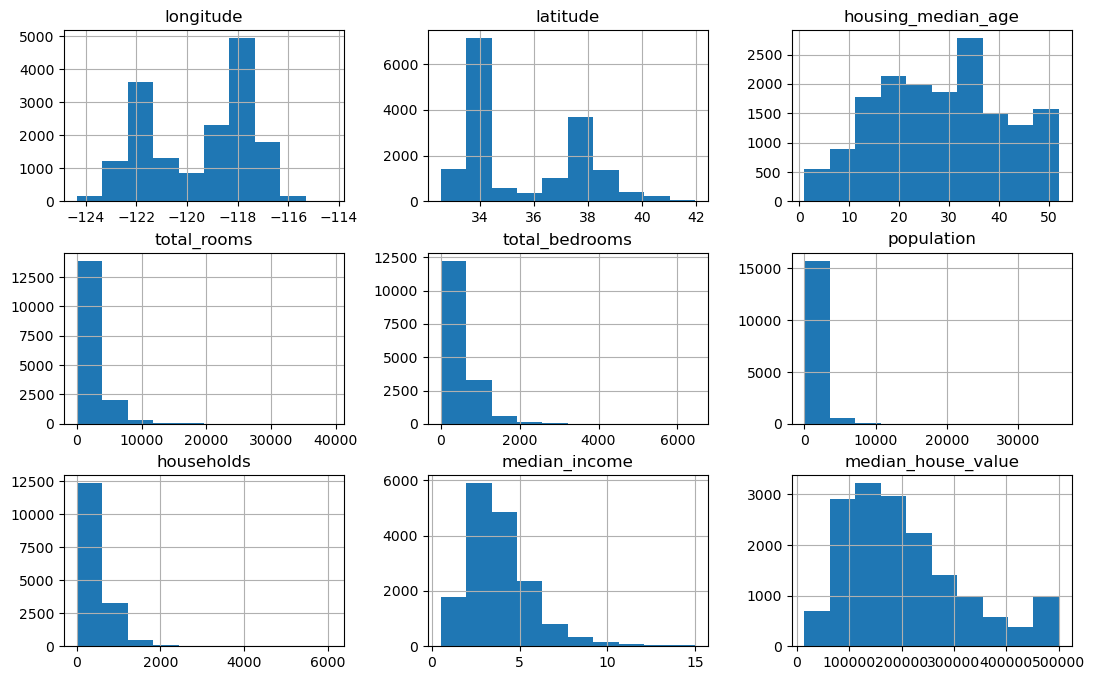

In [12]:
train_df.hist(figsize=(13,8))

In [13]:
train_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     7211
INLAND        5202
NEAR OCEAN    2114
NEAR BAY      1815
ISLAND           4
Name: count, dtype: int64

<Axes: >

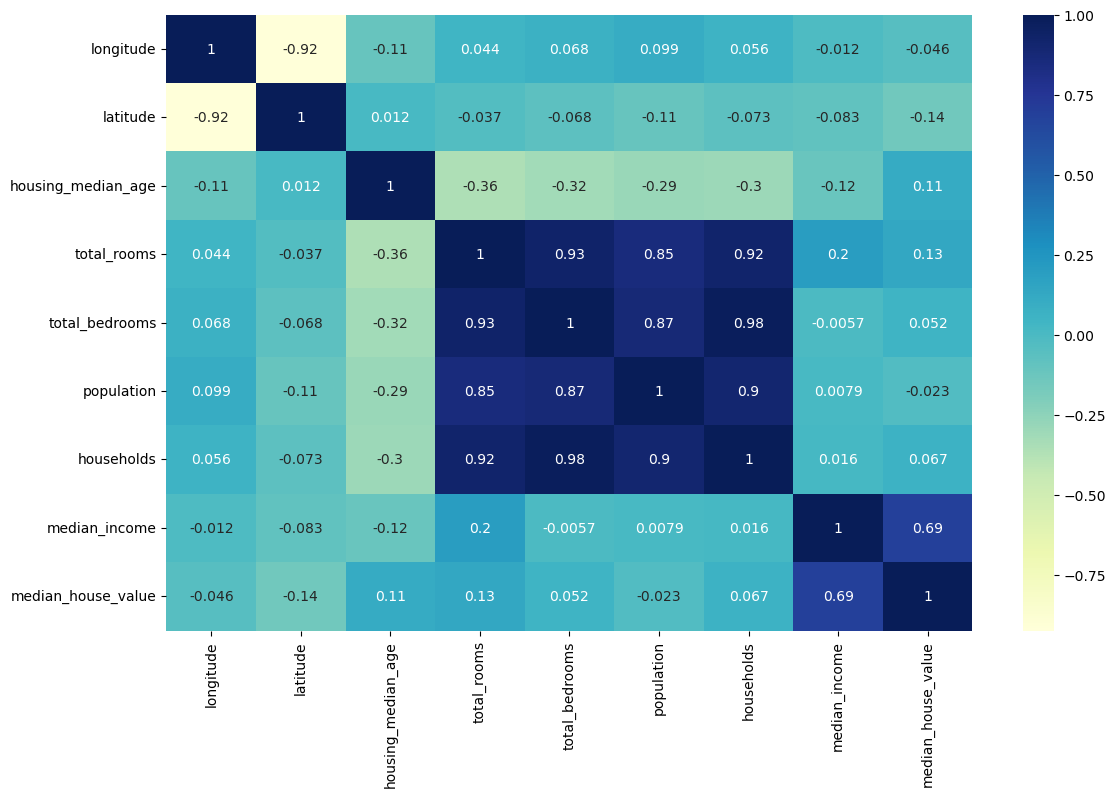

In [14]:
plt.figure(figsize=(13,8))
sns.heatmap(train_df.corr(numeric_only=True),annot=True,cmap='YlGnBu')

In [14]:
train_df=train_df.join(pd.get_dummies(train_df['ocean_proximity'], dtype=int))
# train_df=train_df.drop('ocean_proximity',axis=1)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,<1H OCEAN,259900.0,1,0,0,0,0
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,INLAND,70500.0,0,1,0,0,0
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,INLAND,117800.0,0,1,0,0,0
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,INLAND,185400.0,0,1,0,0,0
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,<1H OCEAN,94200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,4323.0,775.0,1479.0,663.0,6.0758,INLAND,226800.0,0,1,0,0,0
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,INLAND,52500.0,0,1,0,0,0
9944,-122.26,38.16,23.0,2840.0,491.0,1586.0,466.0,4.0337,NEAR BAY,130400.0,0,0,0,1,0
10908,-117.86,33.74,9.0,525.0,171.0,1257.0,165.0,3.3750,<1H OCEAN,165300.0,1,0,0,0,0


one hot encoding

In [16]:
train_df=train_df.drop('ocean_proximity',axis=1)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,259900.0,1,0,0,0,0
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,70500.0,0,1,0,0,0
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,117800.0,0,1,0,0,0
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,185400.0,0,1,0,0,0
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,94200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,4323.0,775.0,1479.0,663.0,6.0758,226800.0,0,1,0,0,0
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,52500.0,0,1,0,0,0
9944,-122.26,38.16,23.0,2840.0,491.0,1586.0,466.0,4.0337,130400.0,0,0,0,1,0
10908,-117.86,33.74,9.0,525.0,171.0,1257.0,165.0,3.3750,165300.0,1,0,0,0,0


<Axes: >

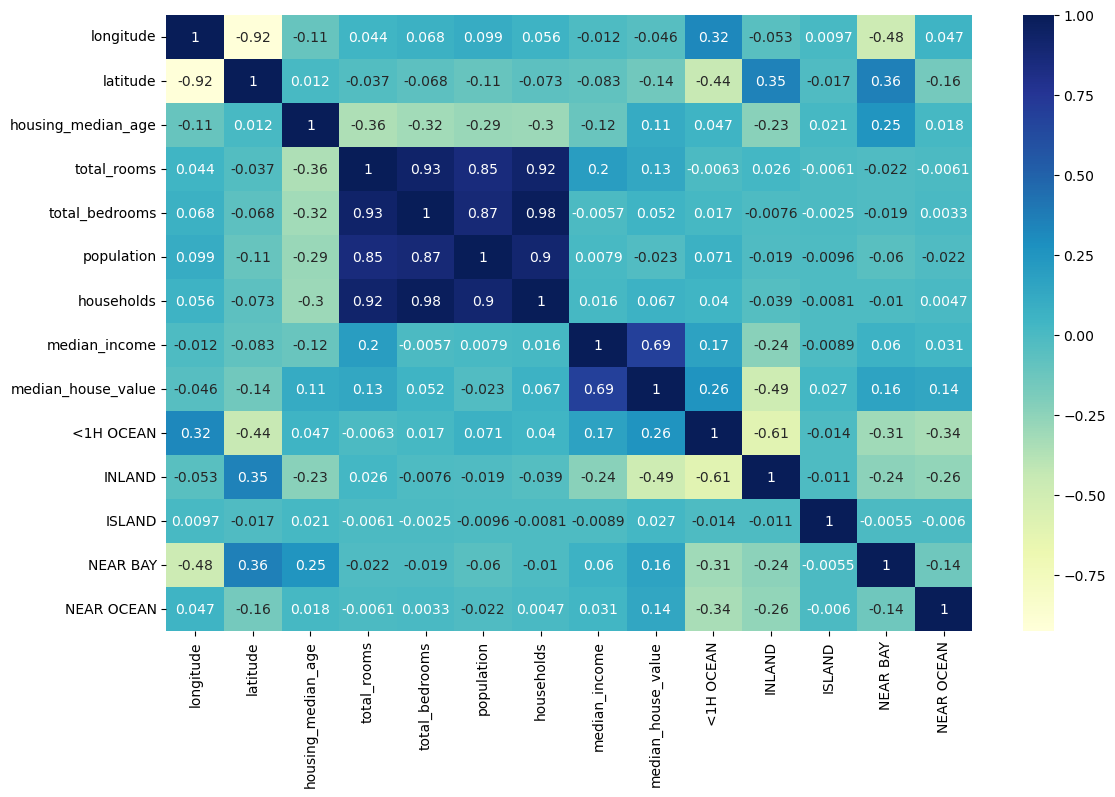

In [17]:
plt.figure(figsize=(13,8))
sns.heatmap(train_df.corr(numeric_only=True),annot=True,cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

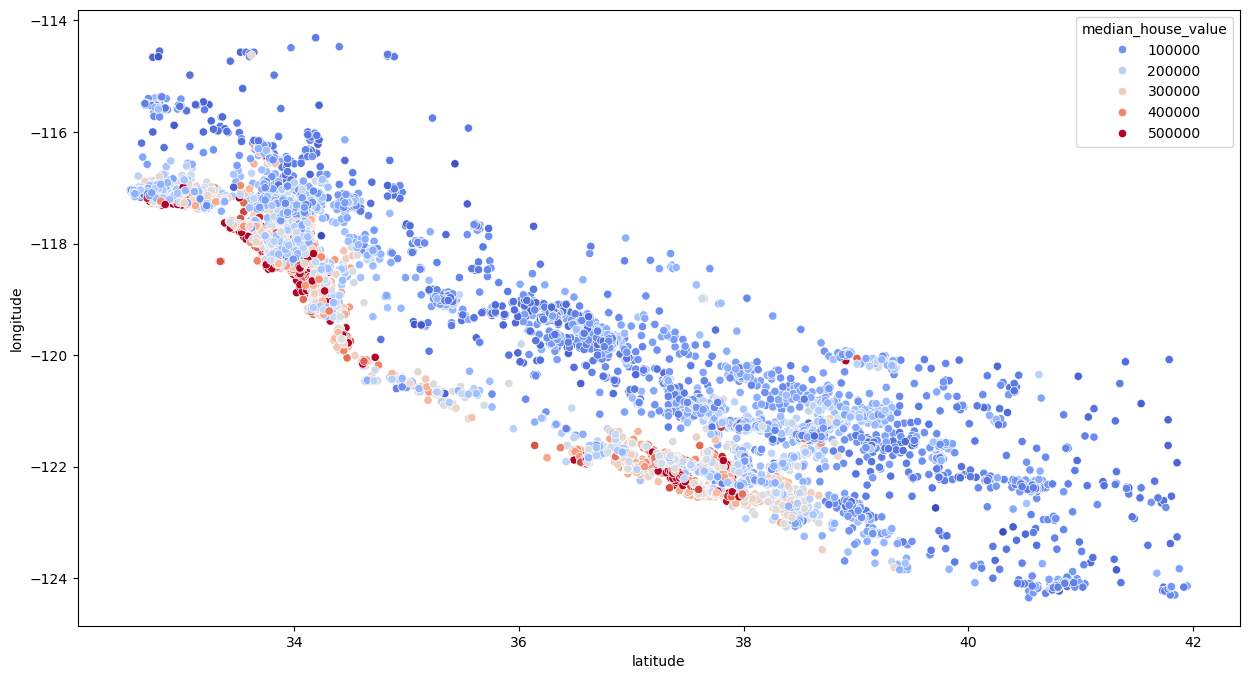

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_df,hue='median_house_value',palette='coolwarm')

*Feature Engineering*

In [20]:
train_df['bedroom_ratio']=train_df['total_bedrooms']/train_df['total_rooms']
train_df['households_rooms']=train_df['total_rooms']/train_df['households']

<Axes: >

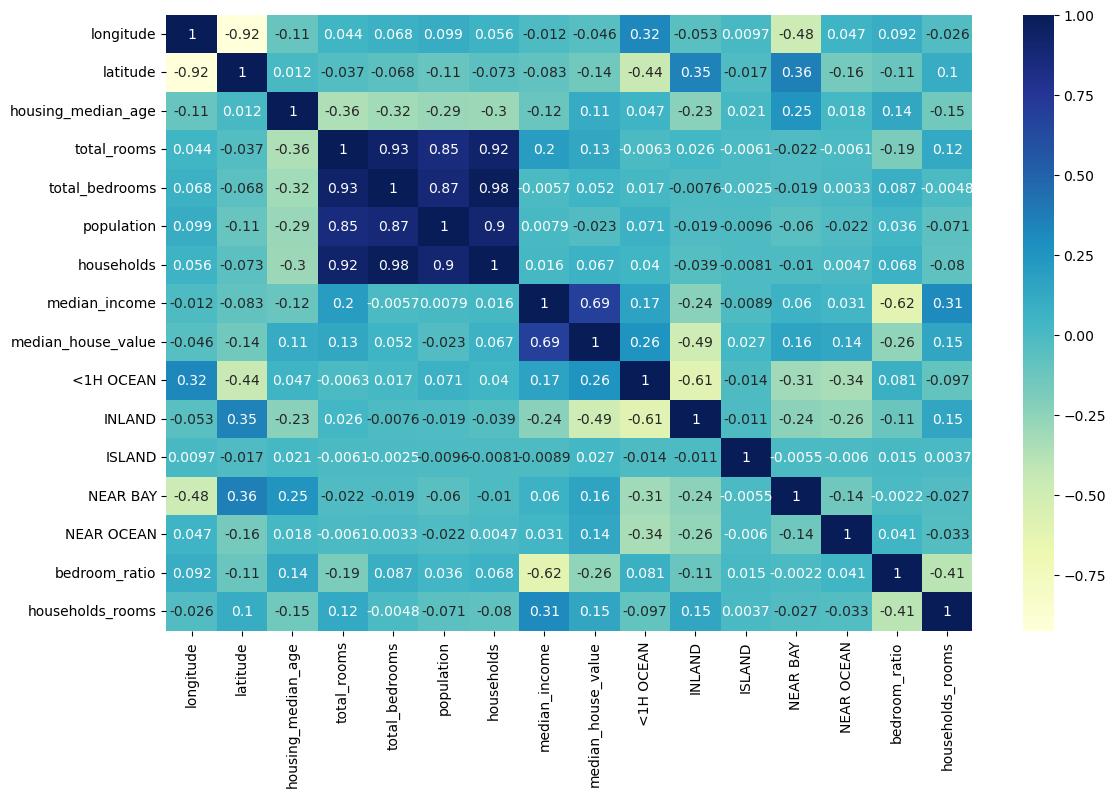

In [21]:
plt.figure(figsize=(13,8))
sns.heatmap(train_df.corr(numeric_only=True),annot=True,cmap='YlGnBu')


*Linear Regression*

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train,y_train=train_df.drop('median_house_value',axis=1),train_df['median_house_value']
X_train_s,X_test_s=sc.fit_transform(X_train),sc.transform(X_test)

reg=LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [23]:
test_df=X_test.join(y_test)
test_df=test_df.join(pd.get_dummies(test_df['ocean_proximity'], dtype=int))
test_df=test_df.drop('ocean_proximity',axis=1)
test_df['bedroom_ratio']=test_df['total_bedrooms']/test_df['total_rooms']
test_df['households_rooms']=test_df['total_rooms']/test_df['households']

In [26]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms
14185,-117.08,32.70,37.0,2176.0,418.0,1301.0,375.0,2.8750,98900.0,0,0,0,0,1,0.192096,5.802667
6125,-117.91,34.11,20.0,3158.0,684.0,2396.0,713.0,3.5250,153000.0,1,0,0,0,0,0.216593,4.429173
14095,-117.10,32.75,11.0,2393.0,726.0,1905.0,711.0,1.3448,91300.0,0,0,0,0,1,0.303385,3.365682
14359,-117.22,32.74,52.0,1260.0,202.0,555.0,209.0,7.2758,345200.0,0,0,0,0,1,0.160317,6.028708
18004,-121.99,37.29,32.0,2930.0,481.0,1336.0,481.0,6.4631,344100.0,1,0,0,0,0,0.164164,6.091476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19533,-120.91,37.66,36.0,1320.0,255.0,720.0,232.0,2.6523,76300.0,0,1,0,0,0,0.193182,5.689655
7695,-118.11,33.96,29.0,2784.0,582.0,1278.0,550.0,4.3882,261600.0,1,0,0,0,0,0.209052,5.061818
15558,-117.07,33.12,12.0,2453.0,599.0,1251.0,529.0,2.4122,127000.0,1,0,0,0,0,0.244191,4.637051
16731,-120.49,35.35,17.0,3043.0,608.0,1457.0,545.0,3.1641,158600.0,1,0,0,0,0,0.199803,5.583486


In [29]:
X_test,y_test=test_df.drop('median_house_value',axis=1),test_df['median_house_value']

In [33]:
reg.score(X_test_s,y_test)

0.6598931542467903

*Random Forest*

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train_s,y_train)


RandomForestRegressor()

In [35]:
forest.score(X_test_s,y_test)

0.8164322227183023